# Projeto: Análise de Churn de Clientes - Telecom X

Este notebook apresenta uma análise exploratória e descritiva dos dados de clientes da Telecom X com o objetivo de identificar os principais fatores que contribuem para o cancelamento de serviços (churn). A partir desta análise, buscaremos extrair insights valiosos que possam subsidiar a equipe de Data Science na criação de modelos preditivos e no desenvolvimento de estratégias de retenção.

**Sumário:**
1.  Configuração Inicial e Carregamento de Dados
2.  Limpeza e Tratamento de Dados
3.  Estatísticas Básicas e Taxa Geral de Churn
4.  Análise Demográfica e de Perfil de Clientes
5.  Análise de Serviços e Contratos
6.  Análise de Correlação com Churn
7.  Visualizações e Métricas Chave
8.  Insights e Recomendações Finais

In [6]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
pd.set_option('display.max_columns', None) 
sns.set_style("whitegrid")

In [9]:
# Carregar a base de dados
df_raw = pd.read_json('TelecomX_Data.json')

# Normalizar os dados aninhados
df = pd.json_normalize(df_raw.to_dict(orient='records'))

# Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
# Exibir informações sobre tipos de dados e valores não-nulos
print("\nInformações do Dataset:")
df.info()


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport   

In [15]:
# Exibir contagem de valores ausentes por coluna
print("\nValores Ausentes por Coluna:")
print(df.isnull().sum())


Valores Ausentes por Coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [18]:
# Exibir as primeiras linhas do DataFrame para inspeção
print("Primeiras 5 linhas do dataset:")
df.head()

Primeiras 5 linhas do dataset:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
# Exibir o formato (linhas, colunas) do dataset
print("\nFormato do Dataset (linhas, colunas):", df.shape)


Formato do Dataset (linhas, colunas): (7267, 21)


In [25]:
# Limpeza de Dados

# 1. Remover linhas onde a coluna 'Churn' está ausente
# A variável 'Churn' é o nosso alvo e linhas com NaN nela não são úteis para análise.
df_clean = df.dropna(subset=['Churn']).copy()
# 2. Converter 'account.Charges.Total' para numérico
# Esta coluna pode conter valores não numéricos (ex: espaços vazios) que impedem cálculos.
# 'errors='coerce'' converterá quaisquer valores não numéricos em NaN.
df_clean['account.Charges.Total'] = pd.to_numeric(df_clean['account.Charges.Total'], errors='coerce')

# 3. Preencher valores ausentes em 'account.Charges.Total' com a mediana
# Após a conversão, alguns valores podem ter se tornado NaN. A mediana é robusta a outliers.
df_clean['account.Charges.Total'].fillna(df_clean['account.Charges.Total'].median(), inplace=True)

# Verificar se ainda há valores ausentes após a limpeza
print("Valores Ausentes após a Limpeza de Dados:")
print(df_clean.isnull().sum())

# Verificar o novo formato do dataset limpo
print("\nFormato do Dataset Limpo:", df_clean.shape)

Valores Ausentes após a Limpeza de Dados:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Formato do Dataset Limpo: (7267, 21)


In [28]:
# Estatísticas Básicas
# Calcular a taxa geral de churn
churn_rate = (df_clean['Churn'] == 'Yes').mean() * 100
churn_rate = round(churn_rate,1)
print(f'\nTaxa de Churn Geral: {churn_rate}')


Taxa de Churn Geral: 25.7


### 3. Estatísticas Básicas e Taxa Geral de Churn

A taxa de churn geral observada no dataset é de **`25.7%`**.
Este é um percentual considerável de clientes que desistem do serviço, ressaltando a urgência e a importância de identificar os fatores subjacentes e implementar estratégias de retenção eficazes.

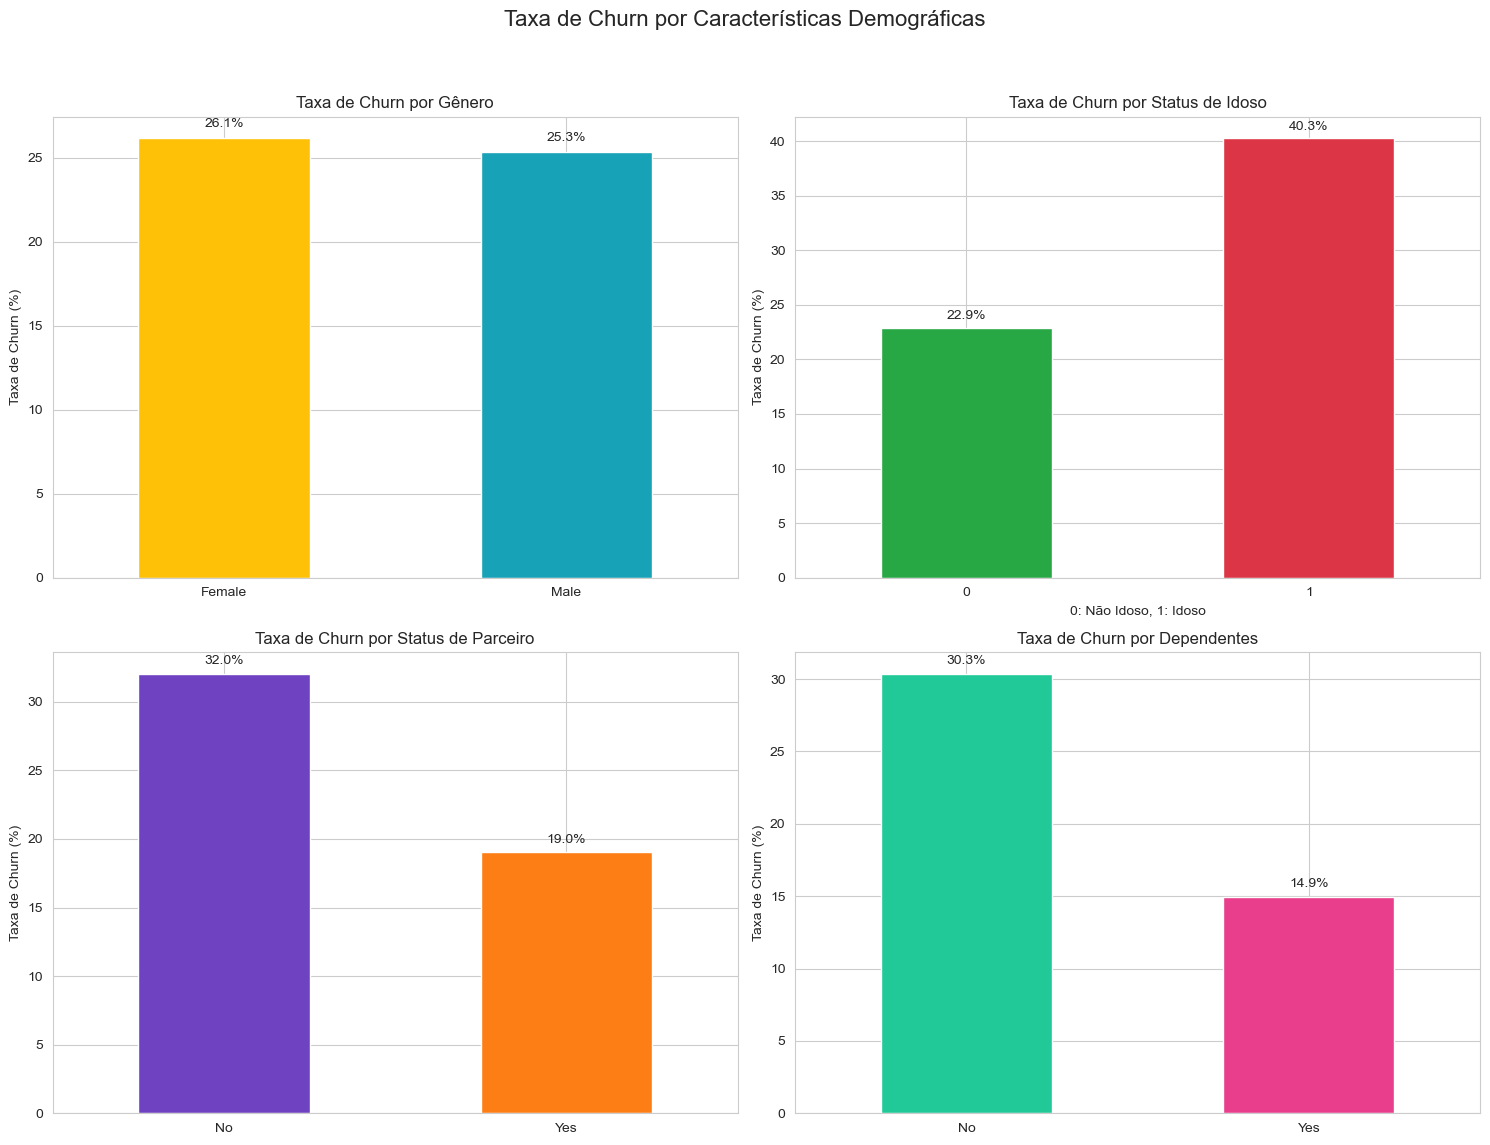

In [33]:
# Análise Demográfica

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Taxa de Churn por Características Demográficas', fontsize=16)

# Gênero vs Churn
gender_churn = df_clean.groupby('customer.gender')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
gender_churn.plot(kind='bar', ax=axes[0,0], color=['#FFC107', '#17A2B8']) 
axes[0,0].set_title('Taxa de Churn por Gênero')
axes[0,0].set_ylabel('Taxa de Churn (%)')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis='x', rotation=0)
for index, value in enumerate(gender_churn):
    axes[0,0].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

# Senior Citizen vs Churn
senior_churn = df_clean.groupby('customer.SeniorCitizen')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
senior_churn.plot(kind='bar', ax=axes[0,1], color=['#28A745', '#DC3545']) 
axes[0,1].set_title('Taxa de Churn por Status de Idoso')
axes[0,1].set_ylabel('Taxa de Churn (%)')
axes[0,1].set_xlabel('0: Não Idoso, 1: Idoso')
axes[0,1].tick_params(axis='x', rotation=0)
for index, value in enumerate(senior_churn):
    axes[0,1].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')


# Partner vs Churn
partner_churn = df_clean.groupby('customer.Partner')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
partner_churn.plot(kind='bar', ax=axes[1,0], color=['#6F42C1', '#FD7E14']) 
axes[1,0].set_title('Taxa de Churn por Status de Parceiro')
axes[1,0].set_ylabel('Taxa de Churn (%)')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis='x', rotation=0)
for index, value in enumerate(partner_churn):
    axes[1,0].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

# Dependents vs Churn
dep_churn = df_clean.groupby('customer.Dependents')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
dep_churn.plot(kind='bar', ax=axes[1,1], color=['#20C997', '#E83E8C']) 
axes[1,1].set_title('Taxa de Churn por Dependentes')
axes[1,1].set_ylabel('Taxa de Churn (%)')
axes[1,1].set_xlabel('')
axes[1,1].tick_params(axis='x', rotation=0)
for index, value in enumerate(dep_churn):
    axes[1,1].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 4. Análise Demográfica e de Perfil de Clientes

A análise demográfica revela importantes padrões de churn:
* **Gênero:** Não há diferença significativa na taxa de churn entre homens e mulheres.
* **Idosos (Senior Citizens):** Clientes idosos (com **`40.3%`** de churn) apresentam uma taxa de cancelamento substancialmente mais alta do que clientes não-idosos (com **`22.9%`** de churn). Este é um segmento de alto risco que merece atenção especial.
* **Parceiros e Dependentes:** Clientes sem parceiro (com **`32.0%`** de churn) ou sem dependentes (com **`19.0%`** de churn) são mais propensos a churnar do que aqueles que possuem parceiros ou dependentes (com **`30.3%`** e **`14.9%`** de churn, respectivamente). Isso pode indicar que clientes com menos "laços" com a operadora são mais voláteis.

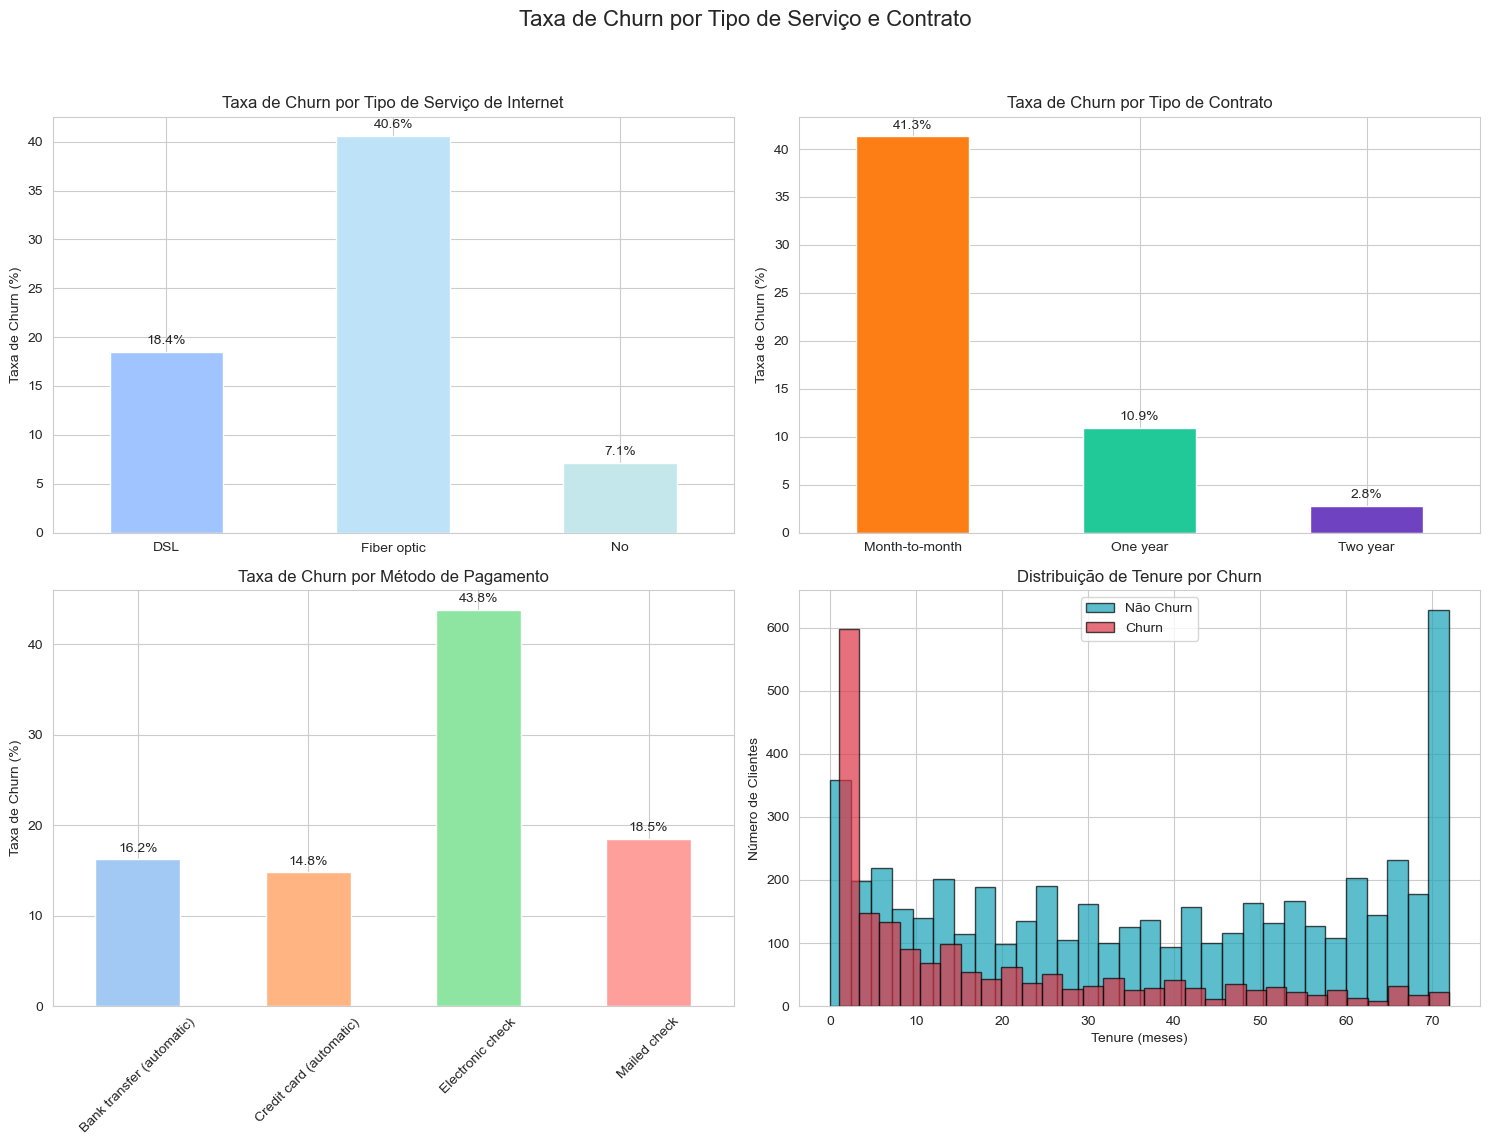

In [38]:
# Análise de Serviços e Contratos

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Taxa de Churn por Tipo de Serviço e Contrato', fontsize=16)

# Internet Service vs Churn
internet_churn = df_clean.groupby('internet.InternetService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
internet_churn.plot(kind='bar', ax=axes[0,0], color=['#A0C4FF', '#BEE3F8', '#C3E7EB']) # Cores ajustadas
axes[0,0].set_title('Taxa de Churn por Tipo de Serviço de Internet')
axes[0,0].set_ylabel('Taxa de Churn (%)')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis='x', rotation=0)
for index, value in enumerate(internet_churn):
    axes[0,0].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

# Contract vs Churn
contract_churn = df_clean.groupby('account.Contract')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
contract_churn.plot(kind='bar', ax=axes[0,1], color=['#FD7E14', '#20C997', '#6F42C1']) # Cores ajustadas
axes[0,1].set_title('Taxa de Churn por Tipo de Contrato')
axes[0,1].set_ylabel('Taxa de Churn (%)')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', rotation=0)
for index, value in enumerate(contract_churn):
    axes[0,1].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

# Payment Method vs Churn
payment_churn = df_clean.groupby('account.PaymentMethod')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
payment_churn.plot(kind='bar', ax=axes[1,0], color=sns.color_palette("pastel")) # Usando paleta seaborn
axes[1,0].set_title('Taxa de Churn por Método de Pagamento')
axes[1,0].set_ylabel('Taxa de Churn (%)')
axes[1,0].set_xlabel('')
#axes[1,0].tick_params(axis='x', rotation=45, ha='right') # Rotação para rótulos longos
axes[1,0].tick_params(axis='x', labelrotation=45)
for index, value in enumerate(payment_churn):
    axes[1,0].text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

# Distribuição de Tenure por Churn (Histograma)
axes[1,1].hist(df_clean[df_clean['Churn']=='No']['customer.tenure'], bins=30, alpha=0.7, label='Não Churn', color='#17A2B8', edgecolor='black')
axes[1,1].hist(df_clean[df_clean['Churn']=='Yes']['customer.tenure'], bins=30, alpha=0.7, label='Churn', color='#DC3545', edgecolor='black')
axes[1,1].set_title('Distribuição de Tenure por Churn')
axes[1,1].set_xlabel('Tenure (meses)')
axes[1,1].set_ylabel('Número de Clientes')
axes[1,1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 5. Análise de Serviços e Contratos

Esta seção destaca a forte influência dos serviços contratados e dos termos do contrato na decisão de churn:
* **Serviço de Internet:** Clientes com **Fibra Óptica (com `40.6%` de churn)** apresentam a taxa de cancelamento mais alta, superando os de DSL e aqueles sem internet. Isso sugere problemas de qualidade, expectativas não atendidas ou concorrência agressiva para este serviço.
* **Tipo de Contrato:** O tipo de contrato é um preditor CRÍTICO de churn. Clientes com contratos **Mês a Mês (com `41.3%` de churn)** são mais de 4 vezes mais propensos a cancelar do que a média. Em contraste, contratos de **Um ano (com `10.9%` de churn)** e, especialmente, de **Dois anos (com `2.8%` de churn)** demonstram uma retenção significativamente maior.
* **Método de Pagamento:** Clientes que utilizam **Cheque Eletrônico (com `43.8%` de churn)** possuem a taxa de churn mais elevada entre todos os métodos. Métodos de pagamento automáticos (transferência bancária e cartão de crédito) estão associados a taxas de churn muito menores.
* **Duração do Cliente (Tenure):** O histograma mostra claramente que a maioria dos clientes que churnam possui um `tenure` (tempo como cliente) baixo, concentrando-se nos **primeiros meses de serviço**. Clientes com longo `tenure` são muito mais leais.

In [43]:
# Análise de Correlação

# Fazer uma cópia do DataFrame limpo para a análise de correlação
df_corr = df_clean.drop('customerID', axis=1).copy()

# Mapeamento de variáveis binárias para numéricas (0 e 1)
binary_mappings = {
    'Churn': {'No': 0, 'Yes': 1},
    'customer.gender': {'Female': 0, 'Male': 1},
    'customer.Partner': {'No': 0, 'Yes': 1},
    'customer.Dependents': {'No': 0, 'Yes': 1},
    'phone.PhoneService': {'No': 0, 'Yes': 1},
    'account.PaperlessBilling': {'No': 0, 'Yes': 1}
}

for col, mapping in binary_mappings.items():
    if col in df_corr.columns: # Verifica se a coluna existe antes de mapear
        df_corr[col] = df_corr[col].map(mapping)

# One-hot encoding para variáveis categóricas com múltiplas categorias
# 'drop_first=True' evita multicolinearidade (cria N-1 colunas para N categorias)
multi_cat_cols = ['phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
                  'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                  'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']

# Filtrar colunas que realmente existem no DataFrame antes de aplicar get_dummies
multi_cat_cols = [col for col in multi_cat_cols if col in df_corr.columns]
df_corr = pd.get_dummies(df_corr, columns=multi_cat_cols, drop_first=True)

# Calcular as correlações com 'Churn' e ordenar por valor absoluto
correlations = df_corr.corr()['Churn'].sort_values(key=abs, ascending=False)

print("\nTOP 10 MAIORES CORRELAÇÕES COM CHURN (em valor absoluto):")
print(correlations.head(10).round(3))


TOP 10 MAIORES CORRELAÇÕES COM CHURN (em valor absoluto):
Churn                                           1.000
customer.tenure                                -0.352
internet.InternetService_Fiber optic            0.308
account.Contract_Two year                      -0.302
account.PaymentMethod_Electronic check          0.302
internet.OnlineBackup_No internet service      -0.228
internet.StreamingMovies_No internet service   -0.228
internet.StreamingTV_No internet service       -0.228
internet.TechSupport_No internet service       -0.228
internet.InternetService_No                    -0.228
Name: Churn, dtype: float64


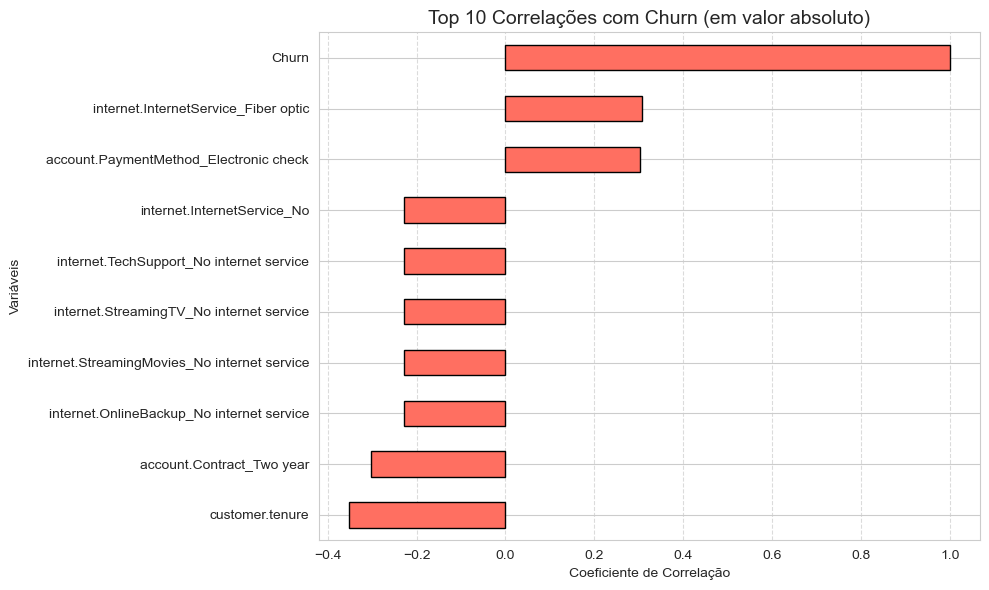

In [46]:
# Visualização gráfica das 10 maiores correlações com Churn
top_10_corr = correlations.head(10).sort_values()  # Ordena para barras ficarem organizadas

plt.figure(figsize=(10, 6))
top_10_corr.plot(kind='barh', color='#FF6F61', edgecolor='black')  # cor personalizada
plt.title('Top 10 Correlações com Churn (em valor absoluto)', fontsize=14)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 6. Análise de Correlação com Churn

A análise de correlação quantifica a relação linear entre as variáveis e o churn (onde 1 significa correlação positiva perfeita, -1 correlação negativa perfeita e 0 sem correlação):
* **Maior Correlação Negativa:** `customer.tenure` (-0.352). Quanto mais tempo o cliente está com a empresa, menor a probabilidade de churn.
* **Maiores Correlações Positivas:**
    * `internet.InternetService_Fiber optic` (+0.308): Clientes com fibra óptica têm maior tendência a churn.
    * `account.PaymentMethod_Electronic check` (+0.302): Clientes que usam cheque eletrônico tendem a churnar mais.
* **Forte Correlação Negativa:** `account.Contract_Two year` (-0.302): Clientes com contratos de dois anos têm uma probabilidade significativamente menor de churn.
* Outras variáveis como a ausência de diversos serviços de internet (Backup Online, Segurança Online, etc.) também mostram correlação negativa forte, reforçando que clientes com serviços mais básicos são mais estáveis.